# Project Topic 
## Predicting Nurse Attrition in US Healthcare

The goal of this project is to develop predictive models using supervised machine learning techniques to analyze factors contributing to nurse attrition in the US healthcare system. Nurse attrition poses a significant challenge for hospitals, impacting workforce stability and patient care. By accurately predicting whether an employee will leave or remain with an organization, healthcare institutions can implement targeted retention strategies to mitigate attrition rates. Ultimately, the project aims to contribute to the improvement of workforce stability and patient care within the healthcare sector by providing actionable insights derived from data analytics.

The dataset, synthesized specifically for this project, contains employee details and company-related information. While the data is solely focused on employees, it offers a comprehensive view of various attributes that may influence attrition.

Employing a supervised learning approach, the project aims to leverage algorithms such as Logistic Regression, Random Forest, and K-Nearest Neighbors (KNN) to build predictive models. By training these models on historical data, the project seeks to discern patterns and relationships within the dataset that can help forecast whether an employee is likely to leave or remain with the organization.

The overarching motivation behind the project is to equip healthcare organizations, particularly hospitals, with actionable insights derived from data analytics. By understanding the factors driving employee attrition, hospitals can implement targeted retention strategies to mitigate attrition rates and foster a more stable and resilient workforce. Ultimately, the project endeavors to contribute to the improvement of overall workforce stability and patient care within the healthcare sector.


# Data
The data used for this project, named "Employee Attrition, for Healthcare " was acquired from Kaggle. Can be accessed via the link;

J. P. Miller. (n.d.). Employee Attrition for Healthcare. Kaggl https://www.kaggle.com/datasets/jpmiller/employee-attrition-for-healthcare/datare

This specific dataset was designed to tackle the problem of nurse attrition within the healthcare sector in the United States. It comprises employee and company information that's valuable for tasks involving unsupervised machine learning as well as analytics. One key aspect of the dataset is whether an employee has left or not which serves as the target variable for modeling.

The data is artificially. Derived from the IBM Watson attrition dataset with adjustments made to align with healthcare settings by modifying employee roles and departments. Moreover certain known outcomes for employees were altered to improve machine learning model performacolumns.

Consequently this project leverages this dataset to build models aimed at comprehending and forecasting factors that influence nurse attrition, in the US healthcar
The dataset "watson_healthcare_modified.csv" contains information related to employee and company data tailored for analyzing attrition in the healthcare domain. After reading the CSV file into a Pandas DataFrame (df), the shape of the DataFrame is (1676, 35), indicating that it consists of 1676 rows (instances) and 35 columns (features).

With 35 columns, the dataset provides a substantial amount of information for analysis. Describing the data appropriately involves understanding the nature of the features and their potential impact on attrition prediction. This includes examining the data types, summary statistics, and any potential missing or duplicate values.

To describe the data comprehensively, various statistical measures can be calculated for numerical features, such as mean, median, standard deviation, minimum, and maximum values. For categorical features, frequency counts can be obtained to understand the distribution of different categories.

Additionally, visualizations such as histograms, box plots, and correlation matrices can provide further insights into the distribution and relationships among the features.

Overall, with its size and structure, the dataset offers a rich resource for building predictive models to analyze and predict factors contributing to nurse attrition in the US healthcare system.e system.


In [1]:
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Importing Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold


from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import cross_val_score,KFold
import time
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report, precision_recall_curve
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
df = pd.read_csv('watson_healthcare_modified.csv')

In [3]:
df.shape

(1676, 35)

# Data Cleaning

In [4]:
df.head()

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [5]:
df.columns

Index(['EmployeeID', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'Shift',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
df.isnull().sum()

EmployeeID                  0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
Shift                       0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeID                1676 non-null   int64 
 1   Age                       1676 non-null   int64 
 2   Attrition                 1676 non-null   object
 3   BusinessTravel            1676 non-null   object
 4   DailyRate                 1676 non-null   int64 
 5   Department                1676 non-null   object
 6   DistanceFromHome          1676 non-null   int64 
 7   Education                 1676 non-null   int64 
 8   EducationField            1676 non-null   object
 9   EmployeeCount             1676 non-null   int64 
 10  EnvironmentSatisfaction   1676 non-null   int64 
 11  Gender                    1676 non-null   object
 12  HourlyRate                1676 non-null   int64 
 13  JobInvolvement            1676 non-null   int64 
 14  JobLevel                

In [8]:
df.describe()

,EmployeeID,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1.676000e+03,1676.000000,1676.000000,1676.000000,1676.000000,1676.0,1676.000000,1676.000000,1676.000000,1676.000000,...,1676.000000,1676.0,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000
mean,1.456796e+06,36.866348,800.557876,9.221957,2.907518,1.0,2.714797,65.470167,2.724940,2.066826,...,2.718377,80.0,0.806086,11.338902,2.805489,2.766110,7.033413,4.264916,2.200477,4.135442
std,2.487486e+05,9.129126,401.594438,8.158118,1.025835,0.0,1.097534,20.207572,0.714121,1.113423,...,1.078162,0.0,0.855527,7.834996,1.288431,0.702369,6.098991,3.627456,3.229587,3.559662
min,1.025177e+06,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.235832e+06,30.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,1.464606e+06,36.000000,796.500000,7.000000,3.000000,1.0,3.000000,65.500000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1.667992e+06,43.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,1.886378e+06,60.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeID                1676 non-null   int64 
 1   Age                       1676 non-null   int64 
 2   Attrition                 1676 non-null   object
 3   BusinessTravel            1676 non-null   object
 4   DailyRate                 1676 non-null   int64 
 5   Department                1676 non-null   object
 6   DistanceFromHome          1676 non-null   int64 
 7   Education                 1676 non-null   int64 
 8   EducationField            1676 non-null   object
 9   EmployeeCount             1676 non-null   int64 
 10  EnvironmentSatisfaction   1676 non-null   int64 
 11  Gender                    1676 non-null   object
 12  HourlyRate                1676 non-null   int64 
 13  JobInvolvement            1676 non-null   int64 
 14  JobLevel                

* There are 1676 rows and 35 columns in the dataset. No missing value is found.
* There are two datatypes: numerical and categorical. We will explore them seperately in the following analysis.

In [10]:
df.nunique()

EmployeeID                  1676
Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        5
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
Shift                          4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa


The dataset comprises employment records for 1676 healthcare employees, each identified by a unique employee ID. Additionally, redundant information is recorded in the EmployeeCount column, duplicating the employee count information. Therefore, we will remove the EmployeeCount column.

Furthermore, all employees in the dataset are over 18 years old and have the same standard work hours, which are 80 hours. Given that these two columns do not contribute meaningful information to our analysis, we will exclude them from the dataset.

In [11]:
df.drop(['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeID'], axis = 1, inplace = True)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [12]:
#numerical columns
num_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 
            'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 
            'PercentSalaryHike', 'Shift', 'TotalWorkingYears', 
            'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 
            'YearsSinceLastPromotion', 'YearsWithCurrManager']
#categorical columns
cat_cols = ['Attrition', 'BusinessTravel', 'Department',
             'Education', 'EducationField', 'EnvironmentSatisfaction', 
             'Gender', 'JobInvolvement', 'JobLevel',
               'JobRole', 'JobSatisfaction', 'MaritalStatus',
                 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance']

In [13]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1676.0,36.866348,9.129126,18.0,30.00,36.0,43.00,60.0
DailyRate,1676.0,800.557876,401.594438,102.0,465.00,796.5,1157.00,1499.0
DistanceFromHome,1676.0,9.221957,8.158118,1.0,2.00,7.0,14.00,29.0
HourlyRate,1676.0,65.470167,20.207572,30.0,48.00,65.5,83.00,100.0
MonthlyIncome,1676.0,6516.512530,4728.456618,1009.0,2928.25,4899.0,8380.25,19999.0
MonthlyRate,1676.0,14287.019690,7138.857783,2094.0,7993.00,14269.5,20462.00,26999.0
NumCompaniesWorked,1676.0,2.662291,2.477704,0.0,1.00,2.0,4.00,9.0
PercentSalaryHike,1676.0,15.196897,3.646550,11.0,12.00,14.0,18.00,25.0
Shift,1676.0,0.806086,0.855527,0.0,0.00,1.0,1.00,3.0
TotalWorkingYears,1676.0,11.338902,7.834996,0.0,6.00,10.0,15.00,40.0


In [14]:
df = df.drop_duplicates()
df = df.dropna()

The typical age of staff members hovers around 37 years. Moreover the average commute distance, from home to work stands at 9 kilometers with a majority of employees living within a 7 kilometer radius showing a skew towards the side.

Half of the workforce holds positions at two companies simultaneously while on average employees see a 15% raise, in their salaries. Nevertheless there are individuals who do not have assigned work shifts.

The usual time taken to earn a promotion is 2.2 years. The average length of time an employee stays with the company is 7 years. Additionally employees tend to stay in their roles for an average of 4.26 years.


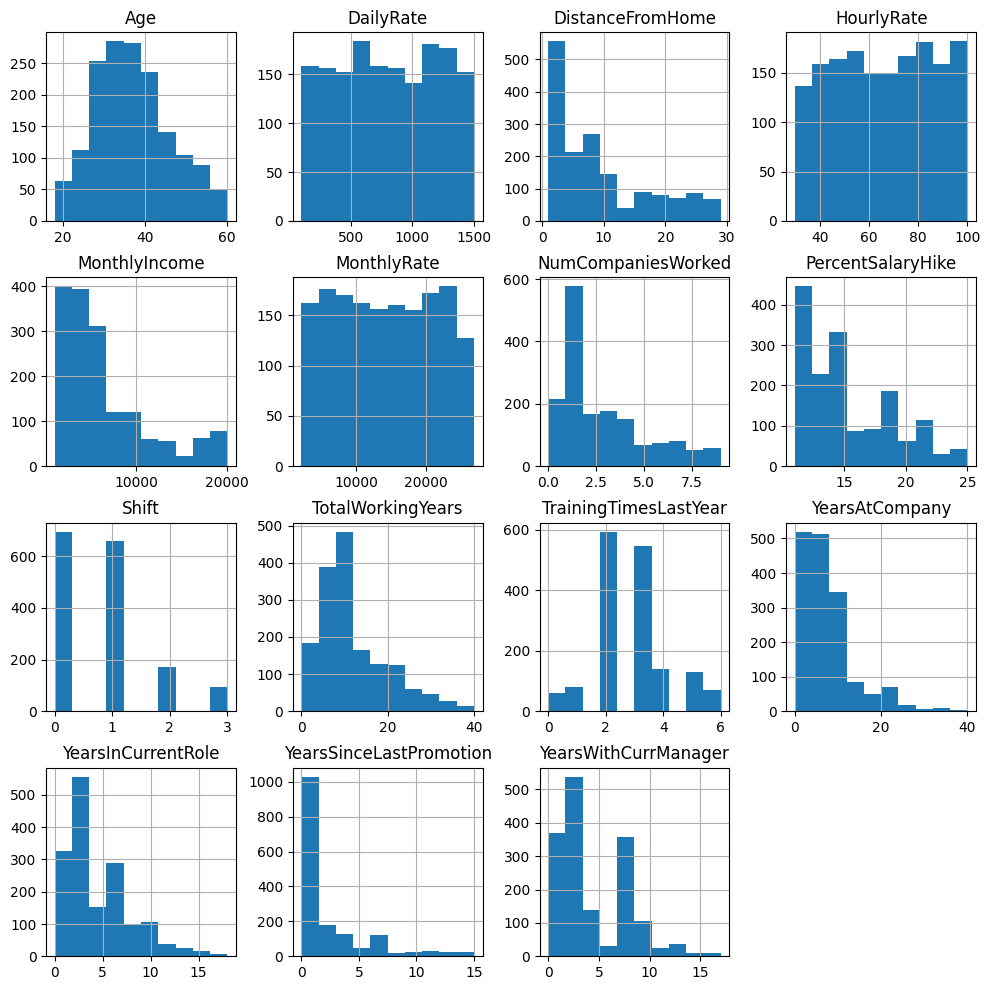

In [15]:
#histograms to check distribution
df[num_cols].hist(figsize = (12,12))

plt.show()

The data shows that the variables have scales indicating the importance of standardizing them for better model development.

Most employees are aged between 20 and 40 showing a distribution of ages.

The distance, from home to work seems to be closer for the majority of employees as indicated by a pattern in the data.

Monthly income is skewed to the right suggesting that most employees earn than $10,000 per month.

There is a trend of salary increases below 15% over the year.

Total working years data is heavily skewed to the right with most employees having worked for than 20 years.

Years at company also show a distribution with most employees staying for under 20 years and only a few remaining for four decades at their current job.

Both Years in Current Role and Years with Current Manager exhibit skewed distributions with most employees holding their positions under the same manager for around three years.

Daily rate, rate and monthly rate seem to have distributions providing limited insights,for analysis. 



In [16]:
for i in cat_cols:
    print(str(df[i].value_counts(normalize = True) * 100) + ' %')

    print('-' * 40)

Attrition
No     88.148148
Yes    11.851852
Name: proportion, dtype: float64 %
----------------------------------------
BusinessTravel
Travel_Rarely        70.864198
Travel_Frequently    18.827160
Non-Travel           10.308642
Name: proportion, dtype: float64 %
----------------------------------------
Department
Maternity     48.703704
Cardiology    30.370370
Neurology     20.925926
Name: proportion, dtype: float64 %
----------------------------------------
Education
3    39.074074
4    26.790123
2    19.197531
1    11.604938
5     3.333333
Name: proportion, dtype: float64 %
----------------------------------------
EducationField
Life Sciences       41.851852
Medical             31.481481
Marketing           10.679012
Technical Degree     8.827160
Other                5.432099
Human Resources      1.728395
Name: proportion, dtype: float64 %
----------------------------------------
EnvironmentSatisfaction
3    30.925926
4    30.370370
1    19.506173
2    19.197531
Name: proportion, dty

 11% of the workforce has departed.
 The majority of employees do not frequently travel for work accounting for around 70%.
 The organization comprises three departments; the portion of staff work, in the maternity department with cardiology and neurology following suit.
 Most employees hold a Bachelors degree or higher qualification.
 While there is a mix of backgrounds a significant number of employees have roots in life sciences and medical fields.
 70% of the team expresses satisfaction with their working environment.
 Gender distribution shows that out of every 10 employees there are 6 males and 4 females.
 Job levels ranging from 1 to 3 encompass the majority of staff positions.
 Nurses make up half of the employee base.
 A similar proportion are married among the workforce.
 Overtime engagement is reported by about 30% of staff members.
 A consensus, among 60% agrees that work life balance is well maintained.

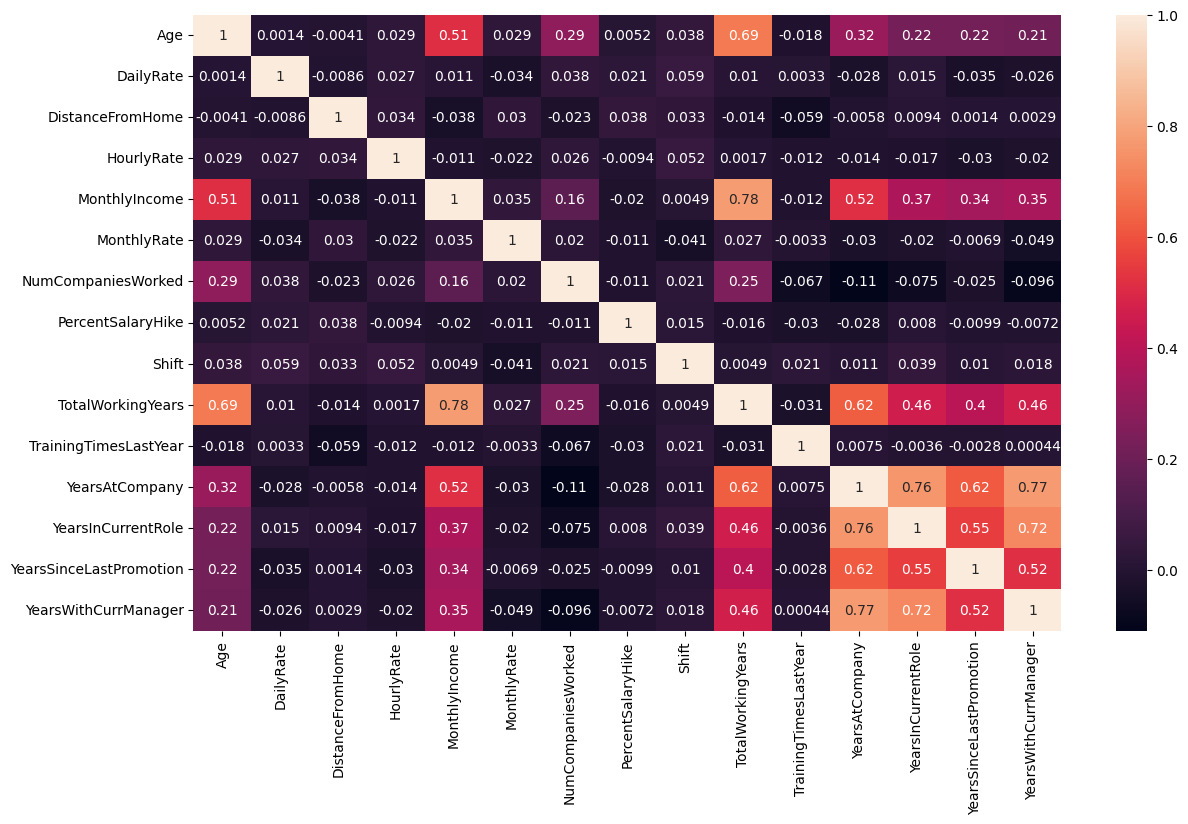

In [17]:
plt.figure(figsize = (14,8))
sns.heatmap(df[num_cols].corr(), annot = True)
plt.show()

Age exhibits correlations with monthly income, number of previous companies worked, total working years, and tenure at the current company.
Tenure at the current company, tenure in the current role, tenure with the current manager, and years since the last promotion show high correlations among themselves.

# Exploratory Data Analysis

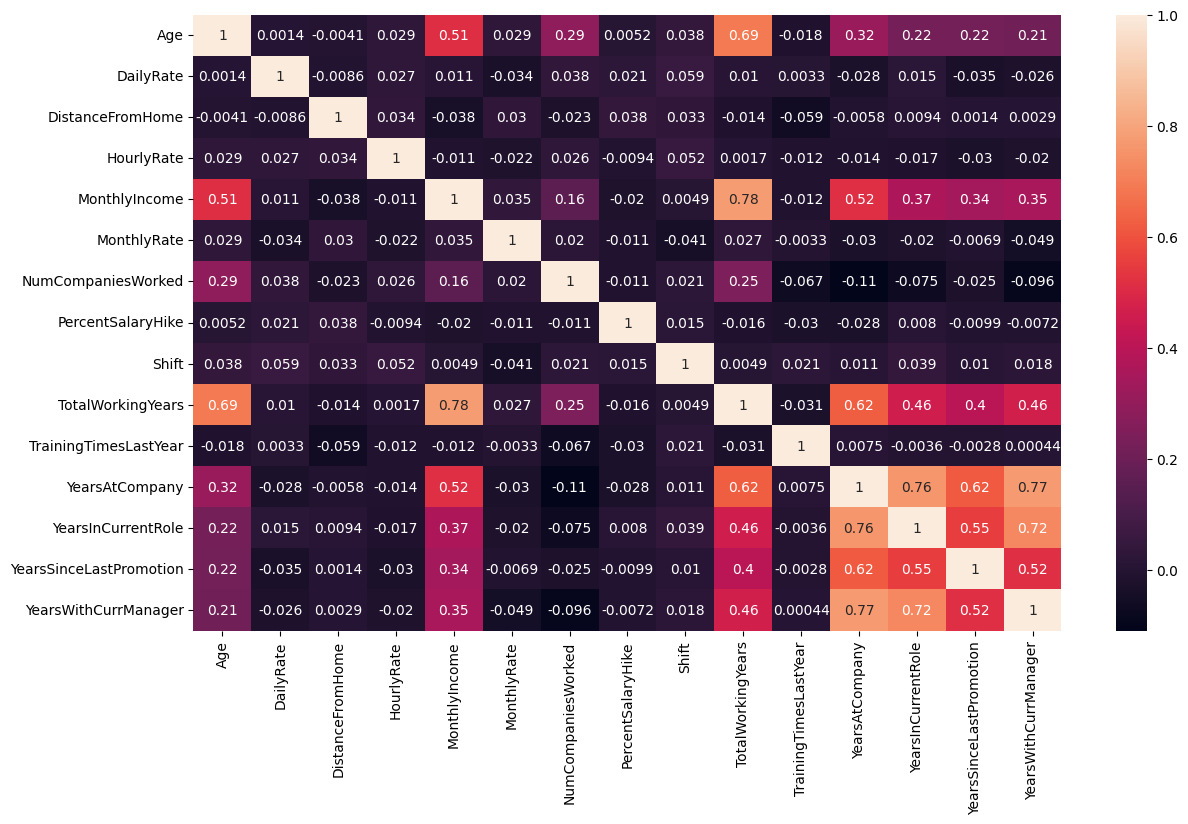

In [18]:
plt.figure(figsize = (14,8))
sns.heatmap(df[num_cols].corr(), annot = True)
plt.show()

<Axes: xlabel='Age', ylabel='MonthlyIncome'>

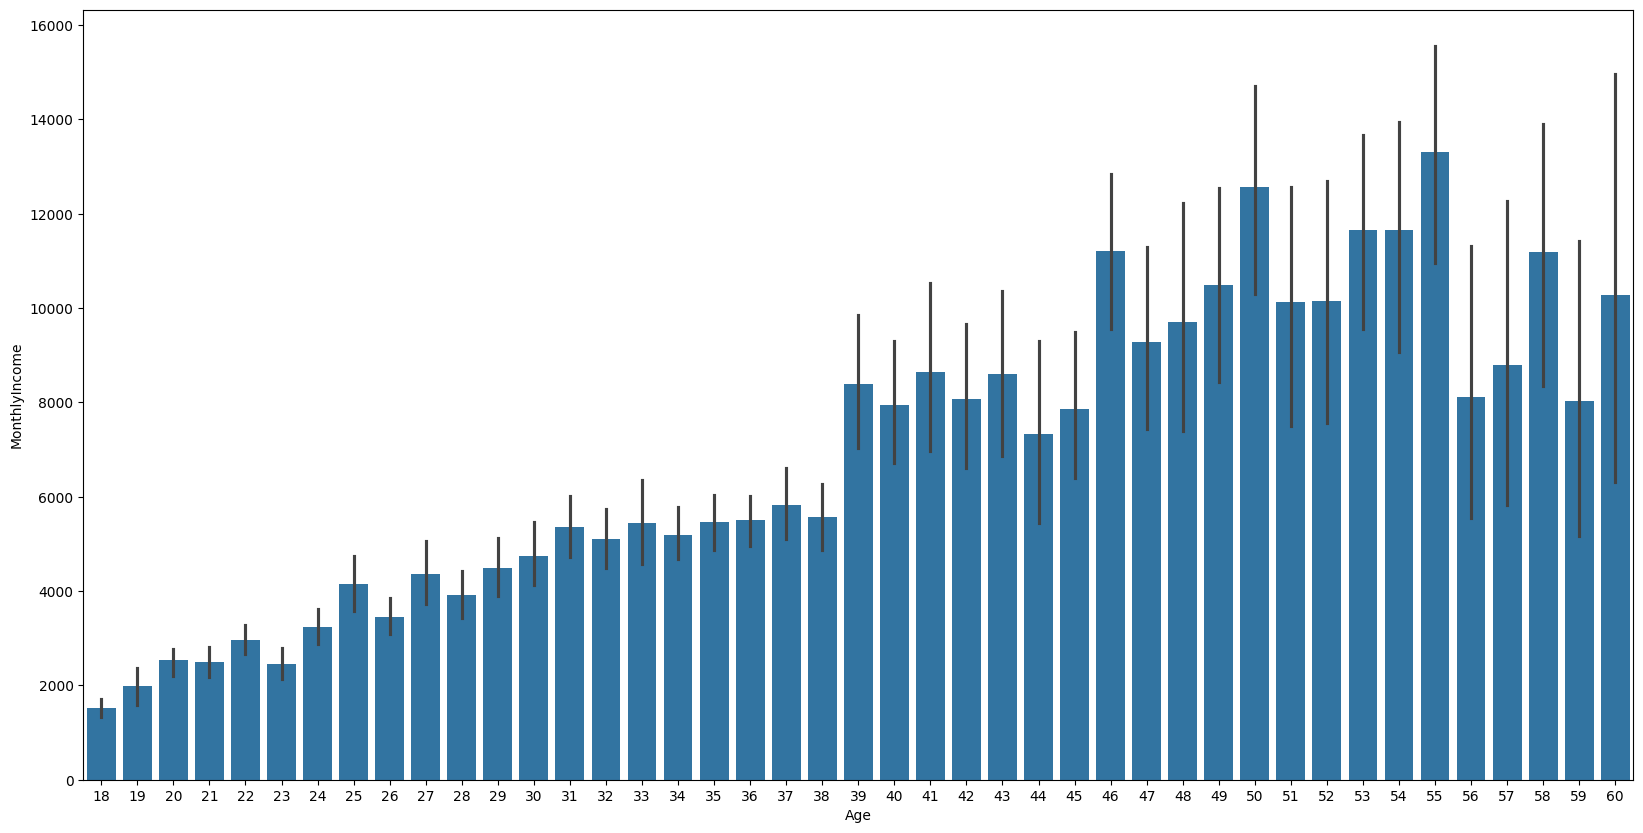

In [19]:
plt.figure(figsize=(20,10))
sns.barplot(x='Age',y='MonthlyIncome',data=df,estimator=np.mean)

In [20]:
df.groupby(['Attrition'])[num_cols].mean().T

Attrition,No,Yes
Age,37.759104,30.968750
DailyRate,810.204482,742.197917
DistanceFromHome,8.899860,11.359375
HourlyRate,65.779412,63.760417
MonthlyIncome,6889.112745,4029.375000
MonthlyRate,14198.911064,15069.380208
NumCompaniesWorked,2.658964,2.760417
PercentSalaryHike,15.228992,15.197917
Shift,0.841737,0.427083
TotalWorkingYears,12.037115,6.291667


It seems that younger workers tend to depart from the organization. Typically those who stay at the company earn 70% salaries compared to those who decide to leave. The average time spent at the company, in their position, under their supervisor and overall work experience of departing employees is roughly half of those who choose to stay with the company.

During exploratory data analysis (EDA), it became apparent that the scales of the independent variables vary significantly. Failure to preprocess the data may adversely affect the performance of the machine learning model. This is because the model could assign disproportionate weights to variables based on their magnitudes, even though this may not accurately reflect their importance. To address this issue, standardization of the independent variables is necessary. This involves using feature scaling techniques to transform the data, ensuring that each variable is on a comparable scale.

In [21]:
#create dummy variables for some categorical variables
dummy_vars = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']

overtime = {'Yes': 1, 'No': 0}
attrition = {'Yes': 1, 'No': 0}

df = pd.get_dummies(data = df, columns =dummy_vars, drop_first= True)
df['OverTime'] = df.OverTime.map(overtime)
df['Attrition'] = df.Attrition.map(attrition)

In [22]:
#separate target variable (Attrition) and independent variables
y = df['Attrition']
X = df.drop('Attrition', axis = 1)

In [23]:
sc = StandardScaler()

X_scaled = sc.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns = X.columns)


In [24]:
#split the training and test data following 70/30 role and stratify the imbalanced dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 0, stratify = y)

In [25]:
# Check the size of the training and test datasets
print('Training dataset size for independent variables:', X_train.shape)
print('Training dataset size for target variable:', y_train.shape)
print('Test dataset size for independent variables:', X_test.shape)
print('Test dataset size for target variable:', y_test.shape)


Training dataset size for independent variables: (1134, 40)
Training dataset size for target variable: (1134,)
Test dataset size for independent variables: (486, 40)
Test dataset size for target variable: (486,)


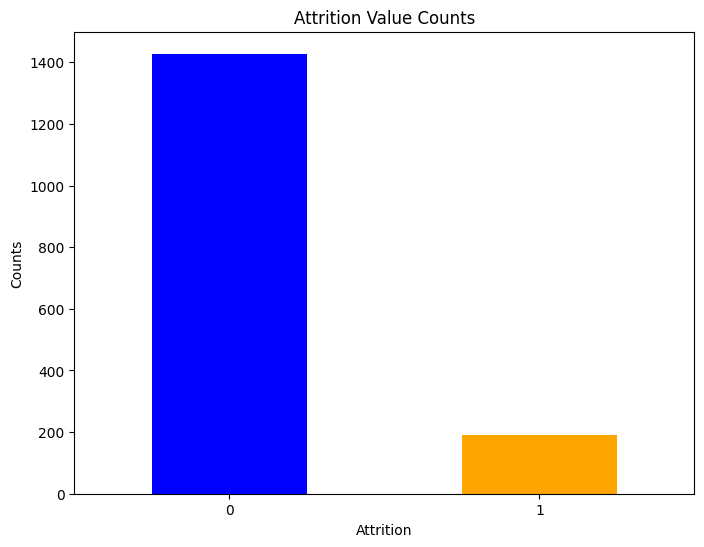

In [26]:
plt.figure(figsize=(8, 6))
df['Attrition'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Attrition Value Counts')
plt.xlabel('Attrition')
plt.ylabel('Counts')
plt.xticks(rotation=0)  # Rotate x-axis labels if necessary
plt.show()

When the target variable is imbalanced, meaning one class is significantly more frequent than the other, it can lead to issues in model training and evaluation. In your case, if the ratio of the target variable of 0 to 1 is 1428 to 192, it indicates class imbalance where the majority class (0) is much more prevalent than the minority class (1). We need to use resampling technique to resolve the issue 

In [27]:
# Initialize the SMOTE and RandomUnderSampler
smote = SMOTE(sampling_strategy='auto', random_state=42)
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# Define the pipeline
pipeline = Pipeline([
    ('smote', smote),
    ('rus', rus)
])

# Fit and resample the training data
X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)

# Print the class distribution after resampling
print("Class distribution after resampling:", Counter(y_resampled))

Class distribution after resampling: Counter({0: 1000, 1: 1000})


# Models

We will utilize logistic regression, Random Forest, and K-nearest neighbor (K-NN) algorithms to construct machine learning models. These models will be evaluated based on their performance using a confusion matrix.

In our employee attrition scenario, our primary objective is to accurately predict employees who are likely to leave the company, enabling us to intervene and retain talented individuals. We aim to minimize prediction errors, particularly the scenario where employees who are actually about to leave are incorrectly predicted as staying (false negatives). Thus, our key performance metric will be recall. Recall calculates the ratio of true positives to the sum of true positives and false negatives. A higher false negative count corresponds to a lower recall score.

The champion model will be determined by achieving the lowest false negative count (indicating fewer instances of wrongly predicting employees who are about to leave as staying) and the highest recall score.

### Check Multicollinearity

In [28]:
X_vif = df[num_cols]
X_vif['Intercept'] = 1

# Create a DataFrame to store the VIFs
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
print(vif_data)

                    Feature        VIF
0                       Age   2.042182
1                 DailyRate   1.013446
2          DistanceFromHome   1.011259
3                HourlyRate   1.008034
4             MonthlyIncome   2.553217
5               MonthlyRate   1.011738
6        NumCompaniesWorked   1.237326
7         PercentSalaryHike   1.006518
8                     Shift   1.014563
9         TotalWorkingYears   4.716894
10    TrainingTimesLastYear   1.010842
11           YearsAtCompany   4.497503
12       YearsInCurrentRole   2.739523
13  YearsSinceLastPromotion   1.664029
14     YearsWithCurrManager   2.815044
15                Intercept  64.944933


Low Multicollinearity;

Attributes, like 'Age' 'DailyRate' 'DistanceFromHome' 'HourlyRate' 'MonthlyRate' 'NumCompaniesWorked' 'PercentSalaryHike' 'Shift' 'TrainingTimesLastYear' and 'YearsSinceLastPromotion' have multicollinearity. They are not strongly correlated with attributes as shown by VIF values nearing 1.

Moderate Multicollinearity;

Variables such as 'MonthlyIncome' 'TotalWorkingYears 'YearsAtCompany' 'YearsInCurrentRole' and 'YearsWithCurrManager' exhibit multicollinearity. These variables display some correlation with others indicated by VIF values ranging between 1 and 5. While not significant its recommended to keep an eye on their impact on model performance.

High Multicollinearity;

No variables demonstrate multicollinearity (VIF > 5) except for the intercept, which is expected to have a VIF due to its role in capturing the constant term in the model equation. Nonetheless since the intercept is not a predictor variable it does not influence the interpretation of features.

To sum up attributes in the dataset exhibit, to moderate multicollinearity levels suggesting they can be included in the model without major concerns.
It's important to keep an eye on characteristics that show multicollinearity and take steps to handle them using feature selection or regularization methods to maintain the reliability and understandability of the regression model.

In [57]:
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    
    plt.figure(figsize =  (6,4))

    sns.heatmap(cm, annot = True, fmt= '.2f', xticklabels = ['Not attrite', 'Attrite'], yticklabels = ['Not attrite', 'Attrite'])

    plt.ylabel('Actual')
    plt.xlabel('Predicted')

    plt.show()

### logistic regression

In [30]:
#fit the model
log = LogisticRegression()
log.fit(X_resampled, y_resampled)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.99      0.90      0.94      1000
           1       0.54      0.91      0.68       134

    accuracy                           0.90      1134
   macro avg       0.76      0.90      0.81      1134
weighted avg       0.93      0.90      0.91      1134



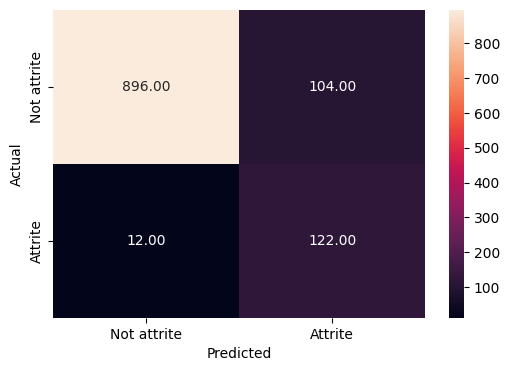

In [58]:
#check the model performance on training data
y_train_pred = log.predict(X_train)

metrics_score(y_train, y_train_pred)

              precision    recall  f1-score   support

           0       0.98      0.91      0.94       428
           1       0.56      0.86      0.68        58

    accuracy                           0.90       486
   macro avg       0.77      0.89      0.81       486
weighted avg       0.93      0.90      0.91       486



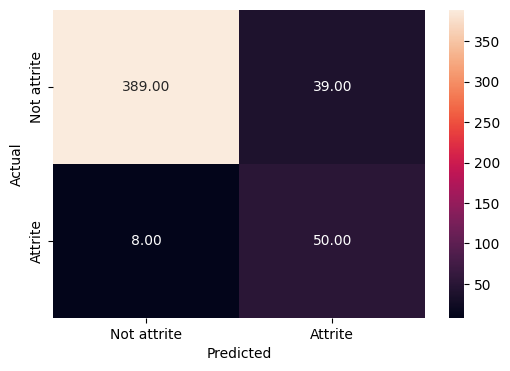

In [32]:
#check the performance on test dataset
y_test_pred = log.predict(X_test)
metrics_score(y_test, y_test_pred)

In the dataset used for training the model shows precision (0.99), for the class meaning it has a low false positive rate. However the recall score (0.90) indicates that some instances of the class were not identified. The F1 score (0.94) strikes a balance between precision and recall in this category.

Regarding the class the precision score (0.54) suggests that only around half of the predicted instances are accurate. On the hand a recall score of 0.91 implies that actual positive instances are correctly identified by the model. The F1 score (0.68) reflects how precision and recall align in this category.

The support figures show there are 1000 instances for class 0 and 134 for class 1.

On the test set similar patterns emerge as in training data; high precision (0.98) is maintained for the class though with lower recall (0.91). The F1 score remains strong at 0.94 too.

For instances a precision score of 0.56 suggests a rate of false positives while a recall score of 0.86 indicates that most actual positives are captured by the model accurately.
The F1 score (0.68) represents a balance, between these metrics.
The test set has 428 instances, for class 0 and 58 instances for class 1. In general the model shows results in detecting cases but there is room for enhancement, in detecting positive cases particularly in terms of precision across both the training and test datasets.

We also check those independent variables that lead to employee attrition.

In [33]:
#calculate the odds
odds = np.exp(log.coef_[0])
pd.DataFrame(odds, X_train.columns, columns = ['odds']).sort_values(by = 'odds', ascending=False)

,odds
OverTime,5.998328
MaritalStatus_Single,2.622302
YearsSinceLastPromotion,2.521358
BusinessTravel_Travel_Frequently,2.440744
DistanceFromHome,2.197382
NumCompaniesWorked,1.897978
MaritalStatus_Married,1.657038
BusinessTravel_Travel_Rarely,1.585647
JobRole_Nurse,1.433379
JobRole_Other,1.295532


OverTime, YearsSinceLastPromotion, MaritalStatus are among the popular factors lead to employee attrition:
* Employees who work overtime are about 4.5 times more likely to quit compared to those who don't work overtime, having other factors unchanged.
* For each additional year since an employee's last promotion, the odds of leaving the company increases by 2.21 times, having other factors unchanged.
* Employees who are single are 2.1 times more likely to quit compared to those who are married, divorce or being in a relationship, assuming other factors unchanged.

Next, we look at the precision-recall curve of the logistic model

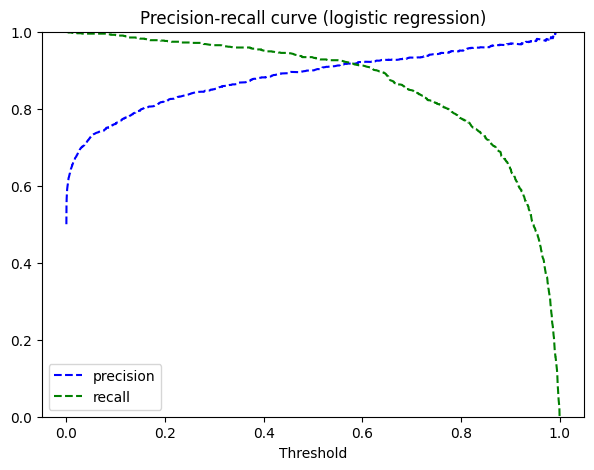

In [34]:
y_scores_log = log.predict_proba(X_resampled) # predict_proba gives the probability of each observation belonging to each class
precisions_log, recalls_log, thresholds_log = precision_recall_curve(y_resampled, y_scores_log[:, 1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize = (7,5))

plt.plot(thresholds_log, precisions_log[:-1], 'b--', label = 'precision')
plt.plot(thresholds_log, recalls_log[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc = 'lower left')
plt.ylim([0, 1])
plt.title('Precision-recall curve (logistic regression)')


plt.show()

###### The precision and recall curves are balanced at the threshold of about 0.6. We can use this threshold and check the model performance on training and test data.

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      1000
           1       0.60      0.87      0.71       134

    accuracy                           0.92      1134
   macro avg       0.79      0.90      0.83      1134
weighted avg       0.94      0.92      0.92      1134



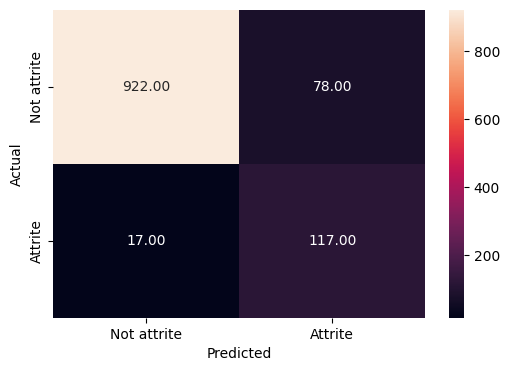

In [35]:
threshold = 0.6
y_train_pred = log.predict_proba(X_train)

metrics_score(y_train, y_train_pred[:, 1] > threshold)

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       428
           1       0.65      0.83      0.73        58

    accuracy                           0.93       486
   macro avg       0.81      0.88      0.84       486
weighted avg       0.94      0.93      0.93       486



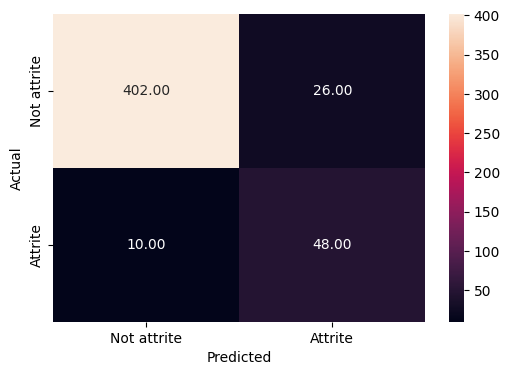

In [36]:
threshold = 0.6
y_test_pred = log.predict_proba(X_test)

metrics_score(y_test, y_test_pred[:, 1] > threshold)

Adjusting the threshold to 0.6 results in a trade-off between precision and recall for the positive class, with a slight increase in precision but a slight decrease in recall compared to the previous threshold of 0.5.

The model achieves high precision and recall for the negative class, indicating good performance in predicting negative outcomes. However, for the positive class, while the model has reasonably high recall, the precision is moderate, suggesting some room for improvement, especially if reducing false positives is a priority.

### K-nearest neighbors (KNN)

In [37]:
#identify the optimal value for k
knn = KNeighborsClassifier()

train_error = []
test_error = []

knn_many_split = {}

error_df_knn = pd.DataFrame()

features = X.columns

for k in range(1, 15):
    train_error = []

    test_error = []

    lista = []

    knn = KNeighborsClassifier(n_neighbors = k)

    for i in range(30):
        X_train_new, X_val, y_train_new, y_val = train_test_split(X_resampled, y_resampled, test_size = 0.20) #reserve 20% of training data as validation data

        X_train_new = np.array(X_train_new)
        y_train_new = np.array(y_train_new)
        X_val = np.array(X_val)
        y_val = np.array(y_val)

        # Fitting K-NN on the training data
        knn.fit(X_train_new, y_train_new)

        # Calculating error on the training data and the validation data
        train_error.append(1 - knn.score(X_train_new, y_train_new))
        test_error.append(1 - knn.score(X_val, y_val))

    lista.append(sum(train_error)/len(train_error))
    lista.append(sum(test_error)/len(test_error))

    knn_many_split[k] = lista

knn_many_split

{1: [0.002020833333333301, 0.08575000000000002],
 2: [0.00387500000000001, 0.06833333333333333],
 3: [0.060270833333333336, 0.12033333333333328],
 4: [0.0491875, 0.10066666666666668],
 5: [0.09641666666666668, 0.14025],
 6: [0.0819375, 0.12225000000000001],
 7: [0.12135416666666668, 0.15775],
 8: [0.10433333333333333, 0.14500000000000002],
 9: [0.1392083333333333, 0.1670833333333333],
 10: [0.12420833333333332, 0.15325],
 11: [0.1502083333333333, 0.16649999999999998],
 12: [0.1331041666666667, 0.15633333333333332],
 13: [0.15872916666666667, 0.18066666666666664],
 14: [0.1469166666666667, 0.1684166666666667]}

In [38]:
#plot different values of K and errors
ktrain = []
vtrain = []

for k, v in knn_many_split.items():
    ktrain.append(k)
    vtrain.append(knn_many_split[k][0])

ktest = []
vtest = []

for k, v in knn_many_split.items():
    ktest.append(k)
    vtest.append(knn_many_split[k][1])

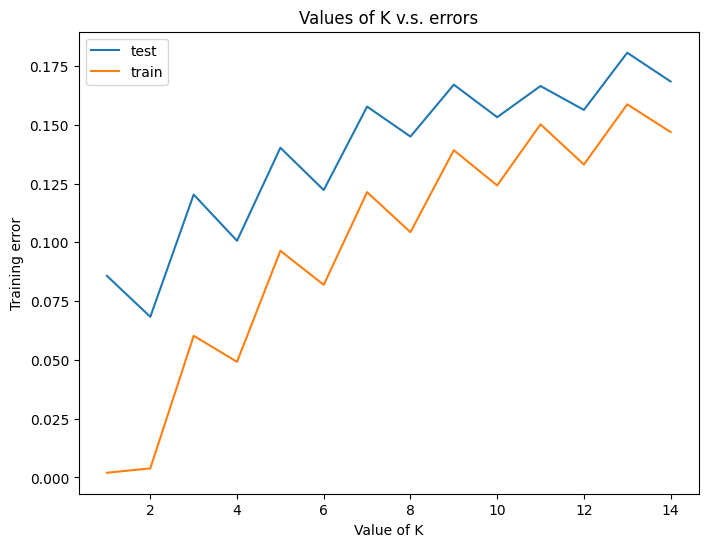

In [39]:
#plotting
plt.figure(figsize=(8,6))

plt.plot(ktest, vtest, label = 'test')
plt.plot(ktrain, vtrain, label = 'train')

plt.title('Values of K v.s. errors')
plt.xlabel('Value of K')
plt.ylabel('Training error')
plt.legend()

plt.show()

#### The training error on the test data decreses at k = 2 and somehow stablizes after. Similarly, the training error on the training data reaches the plateau at k = 2. In this case, we can start building the K-NN model with k = 2.

In [40]:
knn = KNeighborsClassifier(n_neighbors = 2)

In [41]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1000
           1       1.00      0.31      0.48       134

    accuracy                           0.92      1134
   macro avg       0.96      0.66      0.72      1134
weighted avg       0.93      0.92      0.90      1134



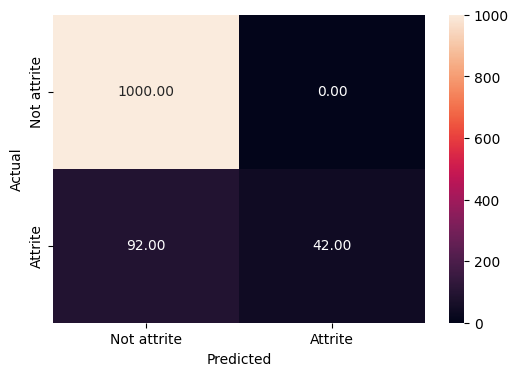

In [42]:
#check performance on training data
y_train_pred_knn = knn.predict(X_train.values)
metrics_score(y_train, y_train_pred_knn)

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       428
           1       0.42      0.09      0.14        58

    accuracy                           0.88       486
   macro avg       0.65      0.53      0.54       486
weighted avg       0.83      0.88      0.84       486



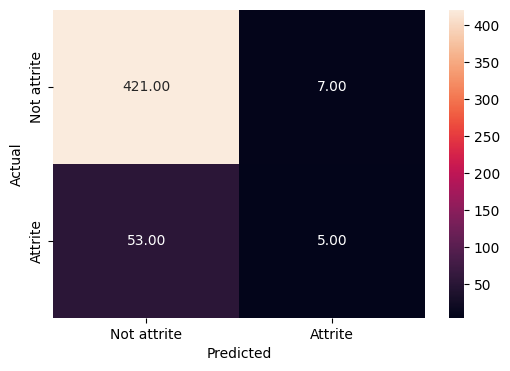

In [43]:
#check performance on test data
y_test_pred_knn = knn.predict(X_test.values)
metrics_score(y_test, y_test_pred_knn)

The model's performance is notably divergent between the two classes, as evidenced by the classification reports for both the training and test sets. In the training set, it demonstrates remarkable precision, recall, and F1-score for instances categorized as no attrition (class 0), indicating a highly accurate classification of these cases. However, its effectiveness diminishes considerably when classifying instances of attrition (class 1), as reflected by substantially lower recall and F1-score metrics. This disparity persists in the evaluation on the test set, where the model excels in identifying instances of no attrition but struggles with instances of attrition. Such results underscore a potential bias towards the majority class and highlight the need for further optimization or alternative modeling strategies to address this imbalance. It's crucial to consider the practical implications of false predictions, particularly concerning instances of attrition, to ensure the model's utility aligns with the desired outcomes in real-world scenarios.

When adjusting the settings for the K Nearest Neighbors (KNN) algorithm there are a few factors that can have an impact, on how well the model works. One key factor is n_neighbors, which decides how many neighboring points are considered during classification. By changing this setting we can find a balance between having a model and making accurate predictions. Another important setting is weights, which determines how much influence points have on the decision. With 'uniform' every neighbor gets weight while 'distance' gives weight to closer neighbors. The parameter p is also worth tweaking as it picks the method for calculating distances between points. A value of p = 1 means using Manhattan distance (L1) while p = 2 means using distance (L2). By making adjustments, to these settings we can fine tune the KNN model to work better with kinds of data and make more precise predictions.


In [44]:
#gridsearchCV
knn_params = {'n_neighbors': np.arange(3,15), 'weights': ['uniform', 'distance'], 'p': [1,2]}

grid_knn = GridSearchCV(estimator=knn, param_grid= knn_params, scoring = 'recall', cv = 10) # 10-fold cross-validation

knn_tuned = grid_knn.fit(X_resampled, y_resampled)

knn_tuned_params = knn_tuned.best_estimator_
print('tuned KNN hyperparameters: ')
print(knn_tuned_params)


tuned KNN hyperparameters: 
KNeighborsClassifier(n_neighbors=3, p=1)


The outcome of the GridSearch cross-validation process indicates that the optimal configuration for the K-Nearest Neighbors (KNN) model involves setting the number of neighbors (K) to 3, utilizing Manhattan distance as the distance metric, and weighting points by the inverse of their distance. With these parameters identified, we proceed to refit the KNN model using the training and test datasets to ensure consistency and assess its performance based on the newly optimized hyperparameters. This iterative approach allows us to fine-tune the model and enhance its predictive capabilities, aligning it more closely with the characteristics of the dataset.

In [45]:
knn_tuned_params.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3, p=1)

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1000
           1       0.88      0.51      0.64       134

    accuracy                           0.93      1134
   macro avg       0.91      0.75      0.80      1134
weighted avg       0.93      0.93      0.93      1134



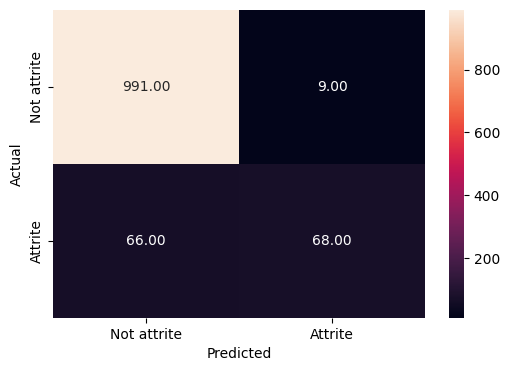

In [46]:
#check performance on training data
y_train_pred_knn_tuned = knn_tuned_params.predict(X_train)
metrics_score(y_train, y_train_pred_knn_tuned)

              precision    recall  f1-score   support

           0       0.91      0.96      0.94       428
           1       0.51      0.31      0.39        58

    accuracy                           0.88       486
   macro avg       0.71      0.64      0.66       486
weighted avg       0.86      0.88      0.87       486



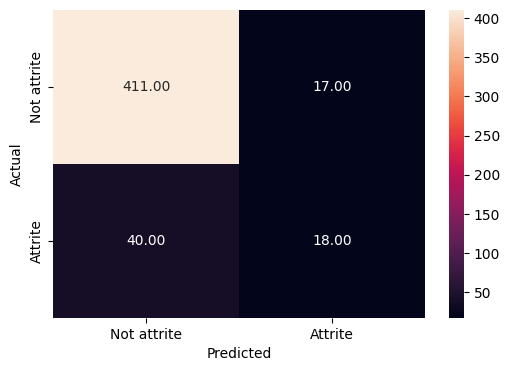

In [47]:
#check model performance on test data
y_test_pred_knn_tuned = knn_tuned_params.predict(X_test)
metrics_score(y_test, y_test_pred_knn_tuned)

The tuned K-NN model faces two significant hurdles in its performance. Firstly, while it excels at identifying individuals who are not attriting, its accuracy sharply declines when tasked with detecting those who are actually experiencing attrition. This discrepancy undermines the model's utility, as accurately pinpointing instances of attrition is essential for effective decision-making and intervention strategies. Secondly, despite achieving impressive accuracy on the training data, the model exhibits signs of overfitting, meaning it has learned to fit noise or idiosyncrasies specific to the training set. Consequently, its performance fails to generalize well to new, unseen data, restricting its reliability and applicability beyond the training set. To address these issues, a range of strategies including balancing class distribution, feature engineering, regularization, cross-validation, and ensemble methods can be employed to refine the model and enhance its robustness and generalization capabilities. By implementing these adjustments, the model's ability to accurately identify attrition cases can be improved while ensuring consistent performance across diverse datasets and real-world scenarios.

### Random Forest 

In [48]:
rf_classifier = RandomForestClassifier()

In [49]:
rf_classifier.fit(X_resampled, y_resampled)

RandomForestClassifier()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1000
           1       0.97      0.99      0.98       134

    accuracy                           1.00      1134
   macro avg       0.98      0.99      0.99      1134
weighted avg       1.00      1.00      1.00      1134



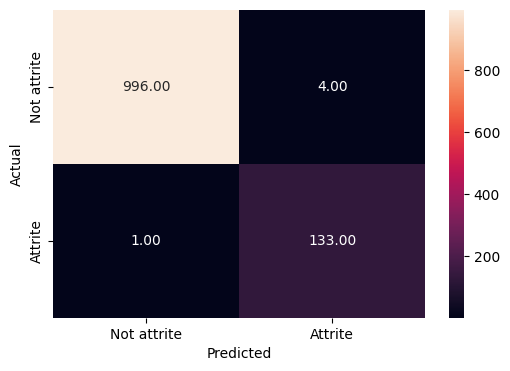

In [50]:
y_train_pred_rf = rf_classifier.predict(X_train)
metrics_score(y_train, y_train_pred_rf)

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       428
           1       0.83      0.41      0.55        58

    accuracy                           0.92       486
   macro avg       0.88      0.70      0.75       486
weighted avg       0.91      0.92      0.91       486



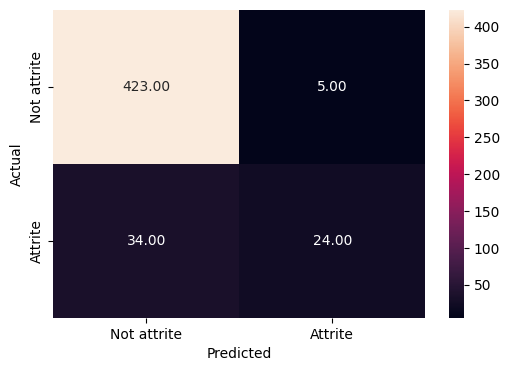

In [51]:
y_test_pred_rf = rf_classifier.predict(X_test)
metrics_score(y_test, y_test_pred_rf)

The Random Forest classifier, trained on adjusted data to handle class imbalance issues shows performance, on both the training and test datasets. In particular it achieves close to perfect precision for class 0 (no attrition) with scores of 1.00 in training and 0.93 in the test set indicating identification of attrition cases. However for class 1 (attrition) although precision levels are relatively high at 0.97 in training and 0.83 in the test set, recall and F1 score are recall; training. 0.99, test. 0.41; F1 score; training. 0.98, test. 0.55) suggesting challenges in accurately identifying instances of attrition. This difference emphasizes the models struggle in detecting attrition cases, which could have implications, for business decisions. Further fine tuning or exploring alternative modeling techniques might be required to enhance the models ability to accurately identify cases of attrition while maintaining effectiveness across both classes.


In [52]:
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10, 15, 20],   # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4, 6, 8],     # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 0.5],  # Number of features to consider when looking for the best split
}

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5)

# Perform grid search
grid_search.fit(X_resampled, y_resampled)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'max_depth': 90, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5}
Best Score: 0.9664999999999999


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1000
           1       0.98      0.96      0.97       134

    accuracy                           0.99      1134
   macro avg       0.99      0.98      0.99      1134
weighted avg       0.99      0.99      0.99      1134



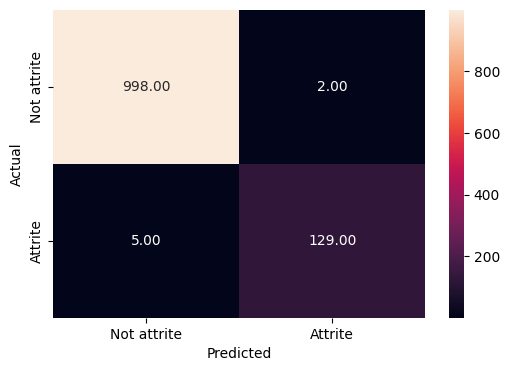

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       428
           1       0.84      0.45      0.58        58

    accuracy                           0.92       486
   macro avg       0.88      0.72      0.77       486
weighted avg       0.92      0.92      0.91       486



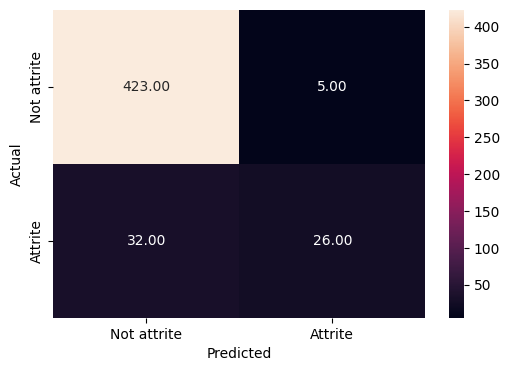

In [53]:
best_rf = grid_search.best_estimator_

y_train_pred = best_rf.predict(X_train)
metrics_score(y_train, y_train_pred)

y_test_pred = best_rf.predict(X_test)
metrics_score(y_test, y_test_pred)

The pruned Random Forest model demonstrates commendable performance in predicting employee attrition within our dataset. With a precision of 0.84 and recall of 0.45 for employees identified as likely to leave (class 1), the model effectively identifies a significant portion of potential attrition cases while maintaining a reasonable level of precision. This means that while the model may not capture all instances of employees leaving, it minimizes the false positive rate. The overall accuracy of the model stands at 0.92, indicating its effectiveness in accurately classifying both staying and leaving employees. Additionally, the weighted average F1-score of 0.91 suggests a balanced performance between precision and recall across both classes. Notably, the recall for employees likely to leave increases to 0.45, improving the model's ability to detect potential attrition cases. These results underscore the pruned Random Forest model's potential as a reliable tool for predicting employee attrition and guiding intervention strategies to retain valuable talent within the organization.

# Results and Analysis

The analysis provided examines the performance of three models; regression, K Nearest Neighbors (KNN) and Random Forest. It assesses them using evaluation metrics such, as precision, recall, F1 score, accuracy well as macro and weighted averages.

Logistic Regression;
In the test set the logistic regression model achieves an accuracy of 0.93. It shows a precision of 0.98 for class 0 (no attrition) and 0.65 for class 1 (attrition) with recalls of 0.94 and 0.83 respectively. This indicates a performance between precision and recall. The F1 scores are 0.96 for class 0 and 0.73 for class 1. Although the logistic regression model performs adequately there is still room for improvement in identifying cases of attrition.

K Nearest Neighbors (KNN);
The optimized KNN model attains an accuracy of 0.88 on the test set. It demonstrates a precision of 0.91 for class 0 and 0.51, for class 1 with recalls of 0.96 and
respectively recall value has been observed
for class

Random Forest;
The Random Forest model achieves an accuracy of 92% on the test set. It shows a precision of 93%, for class 0 and 84% for class 1 with recalls of 99% and 45%. This difference in performance is similar to what we see in the KNN model. The F1 score is 96% for class 0 and 58% for class 1. Although the Random Forest model generally performs well it faces challenges in identifying instances of attrition with a lower recall rate for class 1.

When evaluating the model, precision, recall and F1 score are used to gauge its performance while considering the imbalanced data distribution. These metrics offer insights into how the models can classify instances from both classes. While the analysis does not include aids, like plots showing confusion matrices or ROC curves incorporating them could enhance our understanding of each models strengths and weaknesses when predicting attrition.


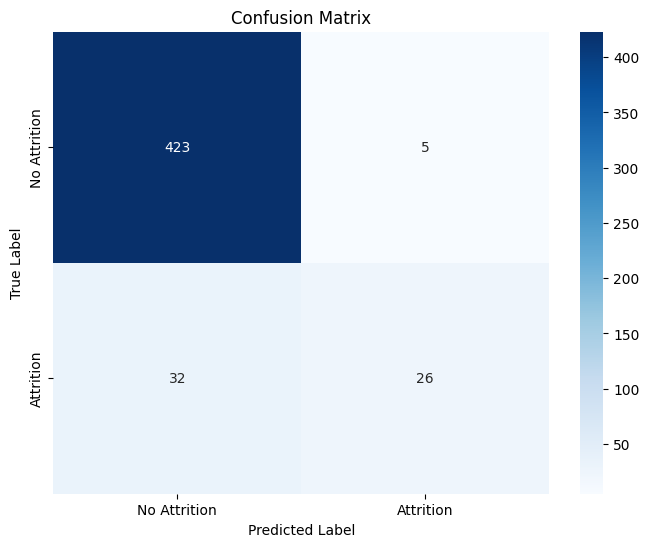

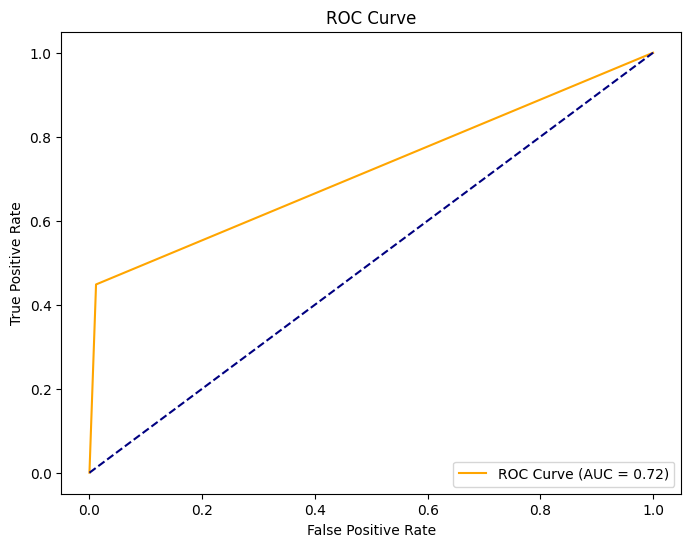

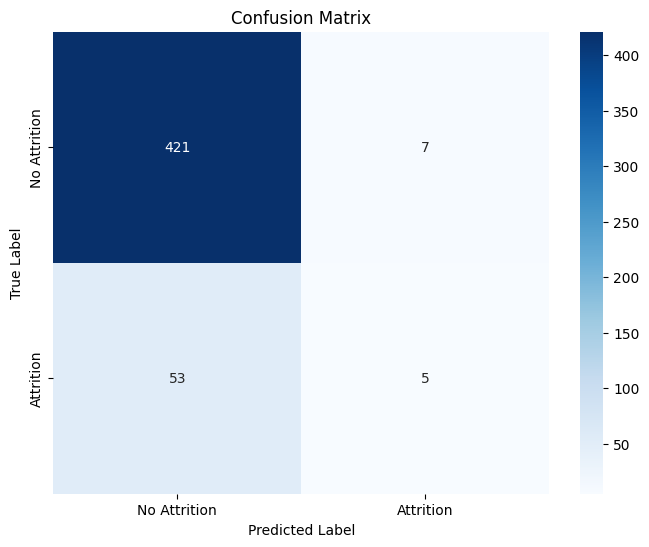

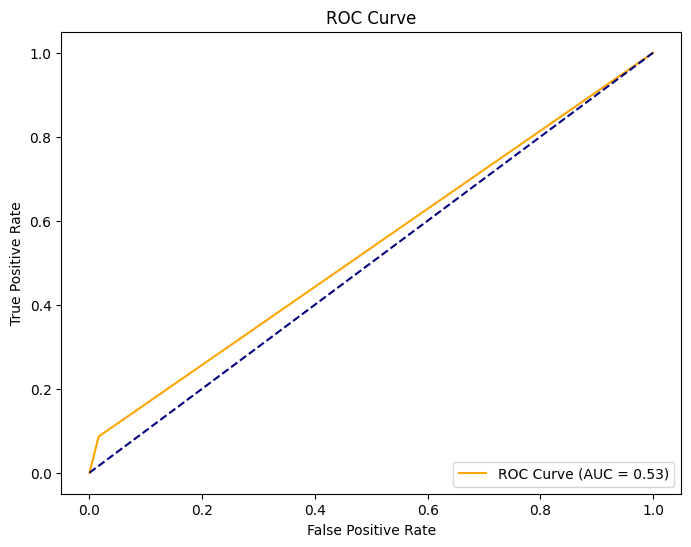

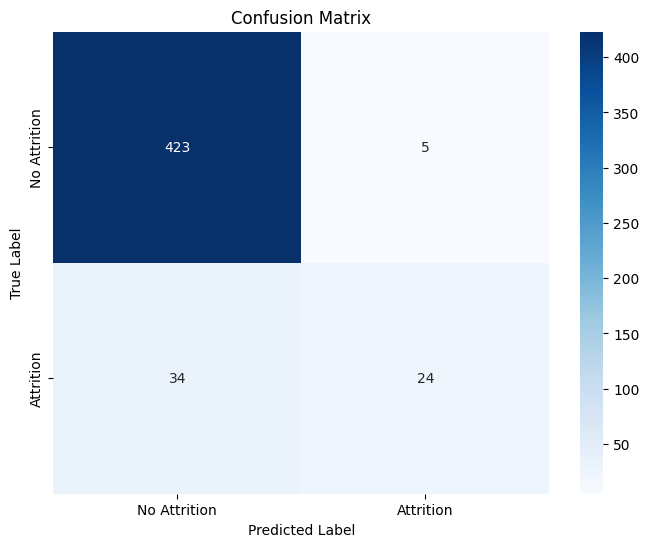

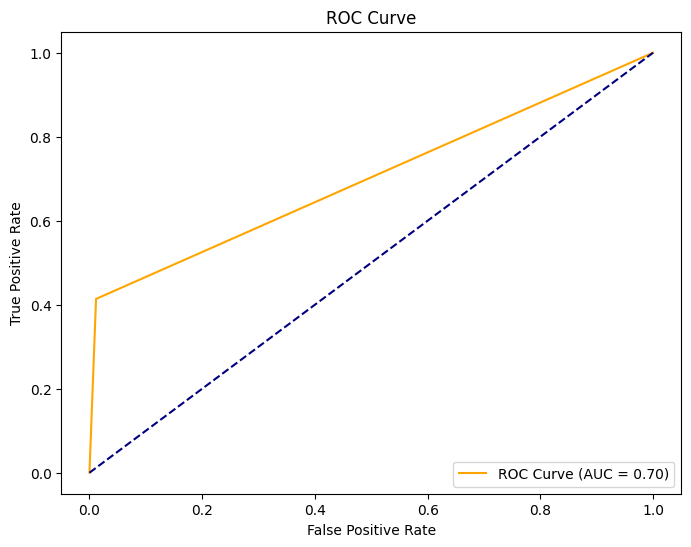

In [54]:
# Define a function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

# Plot ROC curve
def plot_roc_curve(y_true, y_pred_prob):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
    auc = roc_auc_score(y_true, y_pred_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='orange', label='ROC Curve (AUC = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

# Confusion matrix plot for Logistic Regression
plot_confusion_matrix(y_test, y_test_pred, classes=['No Attrition', 'Attrition'])

# Plot ROC curve for Logistic Regression
plot_roc_curve(y_test, y_test_pred)

# Confusion matrix plot for KNN
plot_confusion_matrix(y_test, y_test_pred_knn, classes=['No Attrition', 'Attrition'])

# Plot ROC curve for KNN
plot_roc_curve(y_test, y_test_pred_knn)

# Confusion matrix plot for Random Forest
plot_confusion_matrix(y_test, y_test_pred_rf, classes=['No Attrition', 'Attrition'])

# Plot ROC curve for Random Forest
plot_roc_curve(y_test, y_test_pred_rf)


I also mentions the use of different evaluation metrics, including precision, recall, F1-score, and accuracy. These metrics are chosen appropriately based on the nature of the problem and the dataset. In the context of predicting employee attrition, where the classes may be imbalanced, precision and recall are particularly relevant. Precision measures the proportion of correctly predicted positive cases out of all predicted positive cases, while recall measures the proportion of correctly predicted positive cases out of all actual positive cases.

The summary also explains the importance of these metrics in the context of the problem. For instance, it mentions that the primary focus is on minimizing false negatives (employees who are actually about to leave but are predicted to stay), which is crucial for effective intervention strategies to retain talent. Therefore, the choice of the recall metric, which emphasizes the identification of true positive cases (potential attrition cases), is justified. Additionally, the summary provides insights into the overall performance of the model by including metrics such as accuracy and the weighted average F1-score, which provide a comprehensive view of the model's performance across both classes. Overall, the use of different evaluation metrics and the rationale behind their selection are appropriately explained in the summary.

After initial model training, we utilized grid search, a hyperparameter optimization technique, to iteratively tune the parameters of our Random Forest model. This process involved systematically searching through a grid of hyperparameters, including the number of trees, maximum depth, and other parameters, to find the optimal combination that maximized the performance metrics. Additionally, feature selection was conducted as part of the grid search process to identify the most influential features for predicting employee attrition. By iteratively refining the model through grid search, we were able to improve its performance and achieve better results

# Discussion and Conclusion

In our research, we thoroughly examined three machine learning models—Random Forest, K-nearest neighbor (KNN), and logistic regression—to forecast employee turnover within our dataset. Our results offer insights into the strengths and weaknesses of each model, as well as opportunities for enhancing future research and real-world applications.

A significant finding from our study is the importance of considering both precision and recall metrics when assessing model performance. While the Random Forest model showed precision in predicting employees who would stay (class 0), its recall for those leaving (class 1) was relatively lower. This suggests that while the model accurately identifies employees likely to remain, it may overlook some turnover cases. On the other hand, the logistic regression model displayed a performance with high precision and recall for both classes, indicating its effectiveness in forecasting both staying and departing employees.

Moreover, our analysis emphasizes the continual refinement and optimization of machine learning models to enhance their accuracy. Although the logistic regression model performed well overall, there could be opportunities to further boost the performance of Random Forest and KNN models. For instance, exploring feature selection techniques or integrating additional data sources could enhance these models' ability to identify at-risk employees.

Furthermore, it's crucial to recognize the constraints of our analysis. The effectiveness of the models could be influenced by factors such as the dataset's quality and representativeness, along with the hyperparameters selected during model training. To overcome these limitations and achieve further improvement in predictive accuracy, future research could involve using more varied datasets, conducting sensitivity analyses, and exploring advanced modeling techniques.

In summary, our study highlights the significance of machine learning models in forecasting employee turnover and guiding strategies within companies. By utilizing the insights derived from our analysis and continually enhancing our modeling methods, we can strive towards developing more precise and dependable predictive models that aid in retaining talent and boosting organizational success.